In [ ]:
import numpy as np
import pandas as pd
import nltk
import string as s
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Verizon assignment/archive/train.csv'

# Read CSV file into a DataFrame
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Verizon assignment/archive/test.csv'

# Read CSV file into a DataFrame
df_test = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:

df['Class Index'].value_counts(),df.shape,df.isnull().sum()

(Class Index
 3    30000
 4    30000
 2    30000
 1    30000
 Name: count, dtype: int64,
 (120000, 3),
 Class Index    0
 Title          0
 Description    0
 dtype: int64)

In [ ]:
'''
1 is "World News",

2 is "Sports News",

3 is "Business News" and

4 is "Science-Technology News".
'''

'\n1 is "World News",\n\n2 is "Sports News",\n\n3 is "Business News" and\n\n4 is "Science-Technology News".\n'

In [ ]:
X_train = df['Title'] + " " + df['Description']
y_train = df['Class Index'].values # Class labels need to begin from 0

x_test = df_test['Title'] + " " + df_test['Description']
y_test = df_test['Class Index'].values

In [ ]:
x_test.info

<bound method Series.info of 0       Fears for T N pension after talks Unions repre...
1       The Race is On: Second Private Team Sets Launc...
2       Ky. Company Wins Grant to Study Peptides (AP) ...
3       Prediction Unit Helps Forecast Wildfires (AP) ...
4       Calif. Aims to Limit Farm-Related Smog (AP) AP...
                              ...                        
7595    Around the world Ukrainian presidential candid...
7596    Void is filled with Clement With the supply of...
7597    Martinez leaves bitter Like Roger Clemens did ...
7598    5 of arthritis patients in Singapore take Bext...
7599    EBay gets into rentals EBay plans to buy the a...
Length: 7600, dtype: object>

In [ ]:

# Removal of HTML Tag
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

# Removal of URL
def remove_url(data):
    return  re.sub(r'\s*(?:https?://)?www\.\S*\.[A-Za-z]{2,5}\s*', ' ', data).strip()

def remove_stopwords(data):
    stopWords = stopwords.words('english')
    new_list = []
    for i in data:
        if i.lower() not in stopWords:
            new_list.append(i)
    return new_list

def remove_punctuations(data):
    new_list = []
    for i in data:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_list.append(i)
    return new_list



In [ ]:
def remove_extra_words(text):
    """
    Remove extra words from the given text.

    Args:
    text (str): Input text.

    Returns:
    str: Text with extra words removed.
    """
    extra_words = ['href', 'iii', 'lt', 'gt', 'ii', 'com', 'quot']

    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Remove extra words
    tokens = [token for token in tokens if token.lower() not in extra_words]

    # Reconstruct the text
    processed_text = ' '.join(tokens)

    return processed_text


In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """
    Remove punctuations and stopwords from the given text.

    Args:
    text (str): Input text.

    Returns:
    str: Processed text with punctuations and stopwords removed.
    """
    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Remove punctuations
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Reconstruct the text
    processed_text = ' '.join(tokens)

    return processed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train = X_train.apply(striphtml)
x_test = x_test.apply(striphtml)

In [ ]:
X_train = X_train.apply(remove_url)
x_test = x_test.apply(remove_url)

In [ ]:
# Example usage of the function with apply
X_train_processed = X_train.apply(preprocess_text)
x_test_processed = x_test.apply(preprocess_text)


In [ ]:
X_train_processed = X_train_processed.apply(remove_extra_words)
x_test_processed = x_test_processed.apply(remove_extra_words)

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings_train = model.encode(X_train_processed.tolist())
embeddings_test = model.encode(x_test_processed.tolist())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(embeddings_train, y_train)
rf_pred = rf_classifier.predict(embeddings_test.tolist())

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_classification_report = classification_report(y_test, rf_pred)

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_classification_report)



Random Forest Classifier:
Accuracy: 0.8739473684210526
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.86      0.88      1900
           2       0.92      0.95      0.93      1900
           3       0.84      0.83      0.83      1900
           4       0.85      0.85      0.85      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



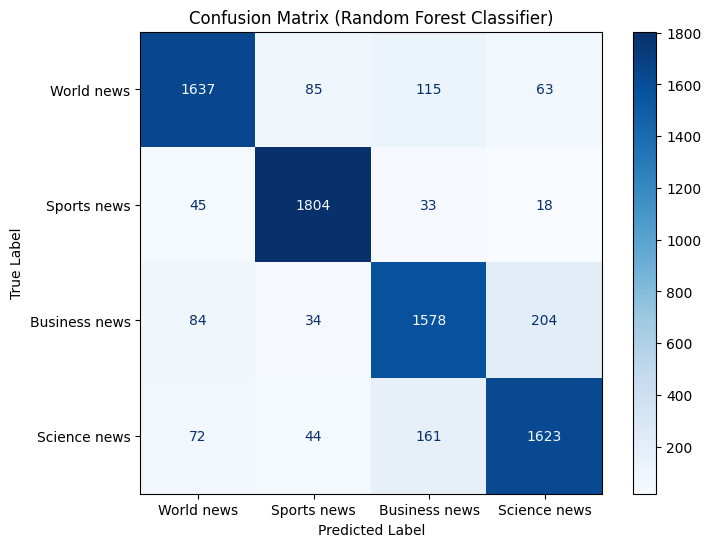

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# Define class labels
class_labels = ['World news', 'Sports news', 'Business news', 'Science news']

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='horizontal')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()


In [ ]:
# Define a mapping dictionary
class_mapping = {1: 0, 2: 1, 3: 2, 4: 3}

# Map the original classes to new numerical labels
y_train_mapped = np.array([class_mapping[label] for label in y_train])

# Print the classes before and after mapping
print("Original classes:", set(y_train))
print("Mapped classes:", set(y_train_mapped))


Original classes: {1, 2, 3, 4}
Mapped classes: {0, 1, 2, 3}


In [ ]:
# Map the original classes to new numerical labels
y_test_mapped = np.array([class_mapping[label] for label in y_test])

# Print the classes before and after mapping
print("Original classes:", set(y_test))
print("Mapped classes:", set(y_test_mapped))

Original classes: {1, 2, 3, 4}
Mapped classes: {0, 1, 2, 3}


In [ ]:
# XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(embeddings_train, y_train_mapped)
xgb_pred = xgb_classifier.predict(embeddings_test.tolist())

# Evaluate XGBoost Classifier
xgb_accuracy = accuracy_score(y_test_mapped, xgb_pred)
xgb_classification_report = classification_report(y_test_mapped, xgb_pred)

print("\nXGBoost Classifier:")
print("Accuracy:", xgb_accuracy)
print("Classification Report:\n", xgb_classification_report)



XGBoost Classifier:
Accuracy: 0.8903947368421052
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1900
           1       0.95      0.96      0.95      1900
           2       0.85      0.85      0.85      1900
           3       0.86      0.87      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



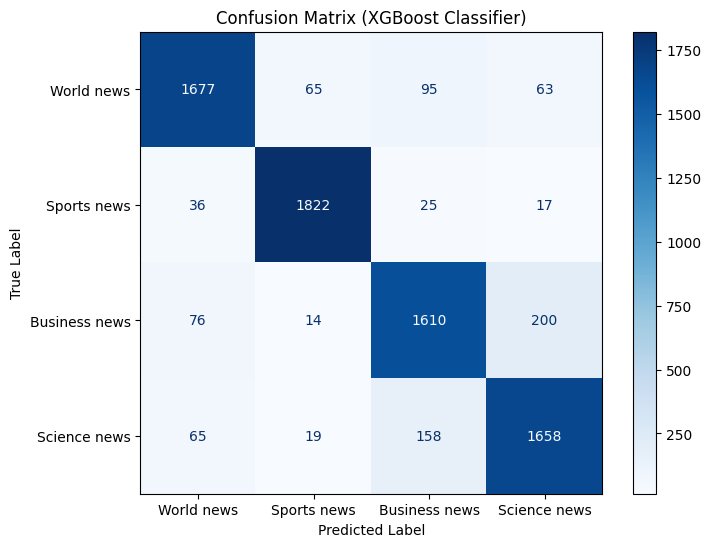

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_mapped, xgb_pred)

# Define class labels
class_labels = ['World news', 'Sports news', 'Business news', 'Science news']

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='horizontal')
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()
